In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('dataset/24-hours Delhi Power Consumption dataset.csv')
dataset.head()

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936,Normal Operation


In [4]:
demand_dataset=pd.read_csv('dataset/hourly data(2000-2023).csv')
demand_dataset.head()

,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,electricity_demand
0,2000-01-01 00:00:00,5,0,1,17.483571,0,0.853473,512.319382
1,2000-01-01 01:00:00,5,1,1,14.308678,0,4.869377,439.055673
2,2000-01-01 02:00:00,5,2,1,18.238443,0,4.997991,539.090652
3,2000-01-01 03:00:00,5,3,1,22.615149,0,2.738188,523.248968
4,2000-01-01 04:00:00,5,4,1,13.829233,0,7.694527,516.822822


In [5]:
weather_dataset=pd.read_csv("dataset/weather_data_delhi_2000_2023.csv")
weather_dataset.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2000-03-06 06:00:00,NaN,NaN,NaN,NaN,NaN,20.0,51.8,NaN,1010.0,NaN,NaN
1,2000-07-29 05:00:00,31.0,26.9,79.0,NaN,NaN,140.0,9.4,NaN,NaN,NaN,NaN
2,2000-09-12 02:00:00,27.0,24.1,84.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,2000-09-26 12:00:00,29.0,18.2,52.0,NaN,NaN,320.0,7.6,NaN,NaN,NaN,NaN
4,2000-10-13 00:00:00,22.0,16.1,69.0,NaN,NaN,230.0,3.6,NaN,NaN,NaN,NaN


In [6]:
'''
    temp=temperature
    dwpt=dew point
    rhum=relative humidity
    prcp=precipitation
    snow=snow depth
    wdir=avg wind direction
    wspd=avg wind speed(km/h)
    wpgt=peak wind gust
    pres=avg sea-level air pressure
    tsun=sunshine
    coco=weather condition code
'''

weather_dataset = weather_dataset[['time', 'temp','dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun']]
weather_dataset.head()

,time,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun
0,2000-03-06 06:00:00,NaN,NaN,NaN,NaN,20.0,51.8,NaN,1010.0,NaN
1,2000-07-29 05:00:00,31.0,26.9,79.0,NaN,140.0,9.4,NaN,NaN,NaN
2,2000-09-12 02:00:00,27.0,24.1,84.0,NaN,NaN,0.0,NaN,NaN,NaN
3,2000-09-26 12:00:00,29.0,18.2,52.0,NaN,320.0,7.6,NaN,NaN,NaN
4,2000-10-13 00:00:00,22.0,16.1,69.0,NaN,230.0,3.6,NaN,NaN,NaN


In [7]:
weather_dataset.isna().sum()

time         0
temp       933
dwpt      1018
rhum      1018
prcp    156371
wdir     25003
wspd       403
wpgt    170352
pres     99631
tsun    170352
dtype: int64

In [8]:
# Convert the 'time' column to datetime format
weather_dataset['time'] = pd.to_datetime(weather_dataset['time'])

# Set the 'time' column as the index
weather_dataset.set_index('time', inplace=True)

# Define a function to fill missing values with the average of the previous 3 hours
def fill_missing_with_rolling_mean(df, window=3):
    return df.rolling(window=window, min_periods=1).mean()

# Apply the function to each column
weather_dataset_filled = weather_dataset.apply(lambda col: col.fillna(fill_missing_with_rolling_mean(col)))

# Reset the index
weather_dataset_filled.reset_index(inplace=True)

weather_dataset_filled.head()

,time,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun
0,2000-03-06 06:00:00,NaN,NaN,NaN,NaN,20.0,51.8,NaN,1010.0,NaN
1,2000-07-29 05:00:00,31.0,26.9,79.0,NaN,140.0,9.4,NaN,1010.0,NaN
2,2000-09-12 02:00:00,27.0,24.1,84.0,NaN,80.0,0.0,NaN,1010.0,NaN
3,2000-09-26 12:00:00,29.0,18.2,52.0,NaN,320.0,7.6,NaN,NaN,NaN
4,2000-10-13 00:00:00,22.0,16.1,69.0,NaN,230.0,3.6,NaN,NaN,NaN


In [9]:
weather_dataset_filled.isna().sum()

time         0
temp       172
dwpt       175
rhum       175
prcp    156371
wdir     13098
wspd         6
wpgt    170352
pres     97573
tsun    170352
dtype: int64

In [10]:
# weather_dataset_filled['prcp'] = weather_dataset_filled['prcp'].fillna(0)

In [11]:
weather_dataset_filled.isna().sum()

time         0
temp       172
dwpt       175
rhum       175
prcp    156371
wdir     13098
wspd         6
wpgt    170352
pres     97573
tsun    170352
dtype: int64

In [12]:
weather_dataset_filled['prcp'] = weather_dataset_filled['prcp'].fillna(0)
weather_dataset_filled.head()

,time,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun
0,2000-03-06 06:00:00,NaN,NaN,NaN,0.0,20.0,51.8,NaN,1010.0,NaN
1,2000-07-29 05:00:00,31.0,26.9,79.0,0.0,140.0,9.4,NaN,1010.0,NaN
2,2000-09-12 02:00:00,27.0,24.1,84.0,0.0,80.0,0.0,NaN,1010.0,NaN
3,2000-09-26 12:00:00,29.0,18.2,52.0,0.0,320.0,7.6,NaN,NaN,NaN
4,2000-10-13 00:00:00,22.0,16.1,69.0,0.0,230.0,3.6,NaN,NaN,NaN


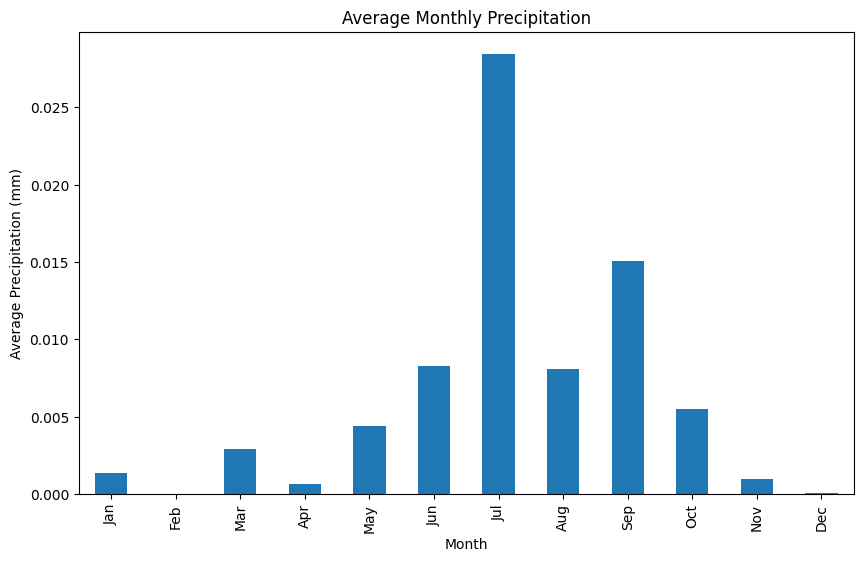

In [13]:

# Group by month and calculate the mean precipitation
monthly_prcp = weather_dataset_filled.groupby('month')['prcp'].mean()

# Plot the monthly precipitation
monthly_prcp.plot(kind='bar', figsize=(10, 6), title='Average Monthly Precipitation')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (mm)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

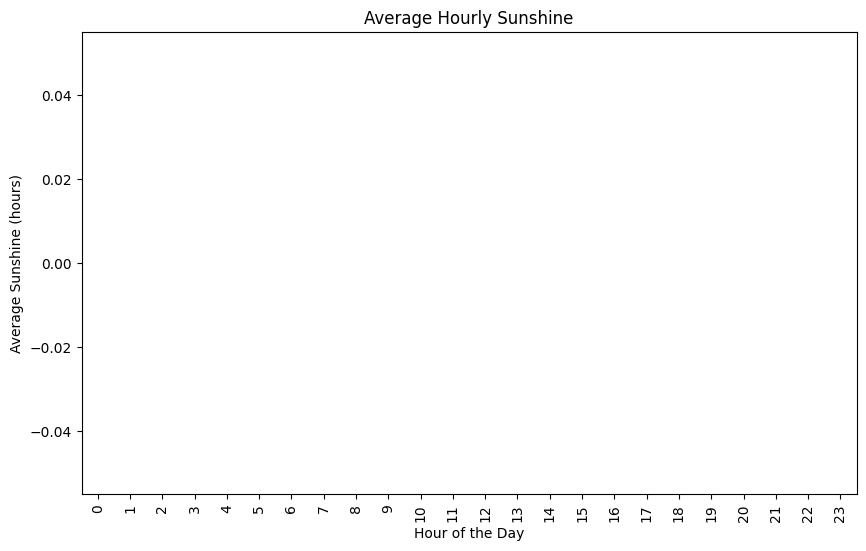

In [14]:
# Extract the hour from the 'time' column
weather_dataset_filled['hour'] = weather_dataset_filled['time'].dt.hour

# Group by hour and calculate the mean sunshine
hourly_sunshine = weather_dataset_filled.groupby('hour')['tsun'].mean()

# Plot the hourly sunshine
hourly_sunshine.plot(kind='bar', figsize=(10, 6), title='Average Hourly Sunshine')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Sunshine (hours)')
plt.xticks(ticks=range(24), labels=range(24))
plt.show()

In [15]:
weather_dataset_filled.drop(columns=['tsun'], inplace=True)

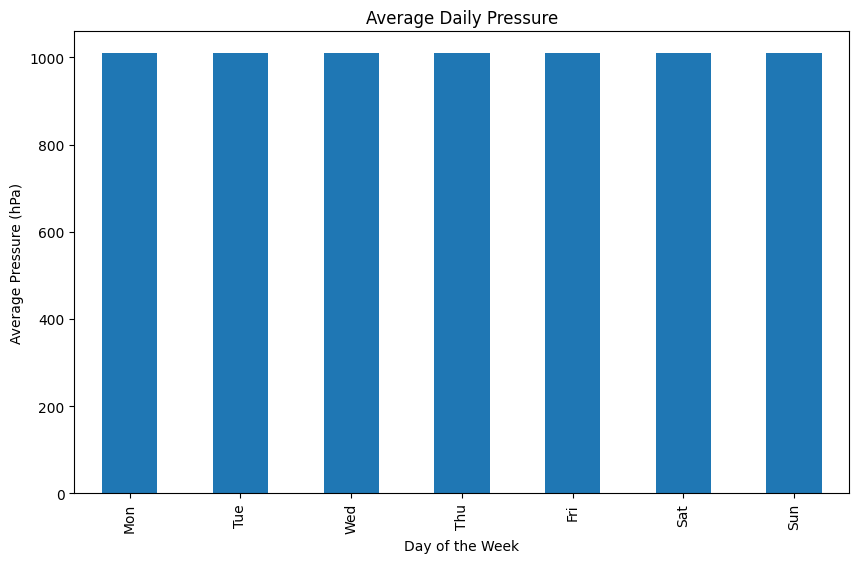

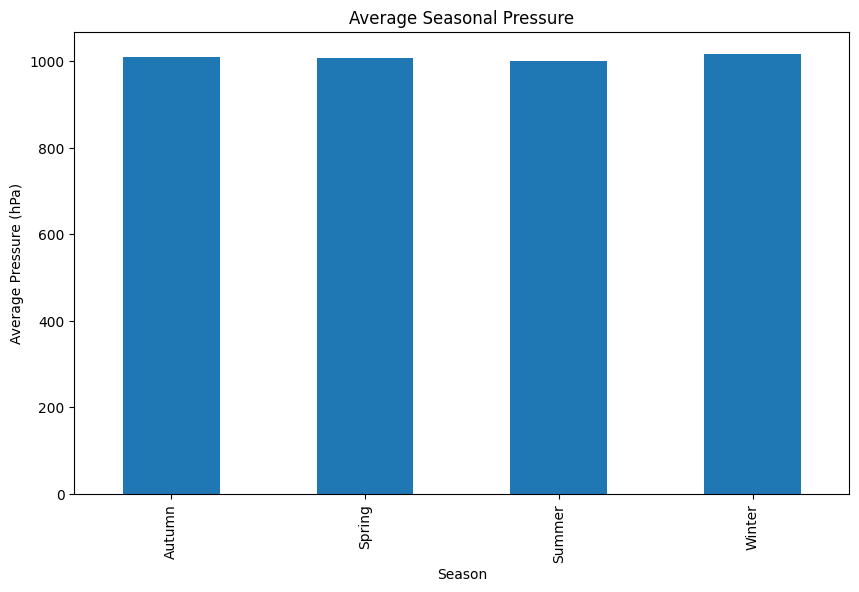

In [16]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create the 'season' column
weather_dataset_filled['season'] = weather_dataset_filled['month'].apply(get_season)

# Group by day of the week and calculate the mean pressure
daily_pres = weather_dataset_filled.groupby(weather_dataset_filled['time'].dt.dayofweek)['pres'].mean()

# Plot the daily pressure
plt.figure(figsize=(10, 6))
daily_pres.plot(kind='bar', title='Average Daily Pressure')
plt.xlabel('Day of the Week')
plt.ylabel('Average Pressure (hPa)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Group by season and calculate the mean pressure
seasonal_pres = weather_dataset_filled.groupby('season')['pres'].mean()

# Plot the seasonal pressure
plt.figure(figsize=(10, 6))
seasonal_pres.plot(kind='bar', title='Average Seasonal Pressure')
plt.xlabel('Season')
plt.ylabel('Average Pressure (hPa)')
plt.show()

In [17]:
weather_dataset_filled.isna().sum()

weather_dataset_filled['pres'] = weather_dataset_filled['pres'].fillna(weather_dataset_filled['pres'].mean())

In [18]:
weather_dataset_filled.isna().sum()

time           0
temp         172
dwpt         175
rhum         175
prcp           0
wdir       13098
wspd           6
wpgt      170352
pres           0
month          0
hour           0
season         0
dtype: int64

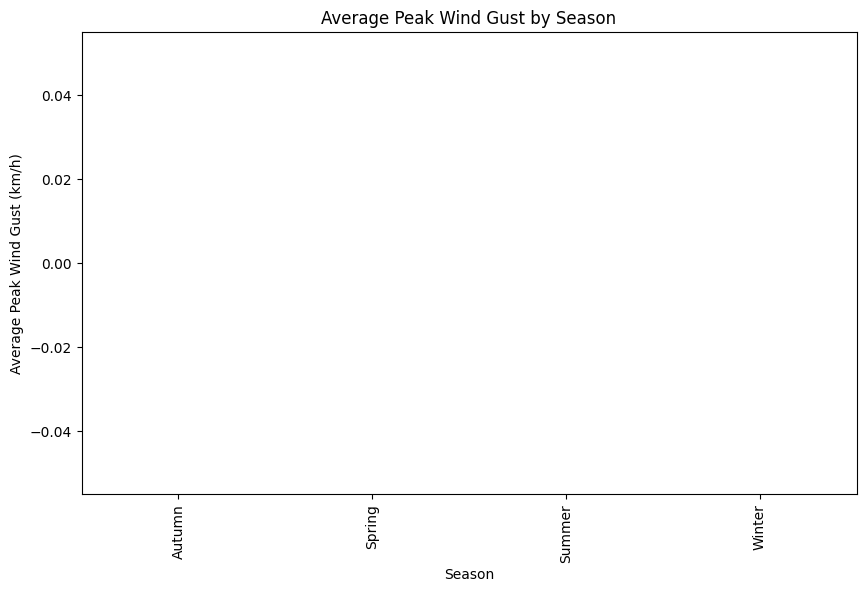

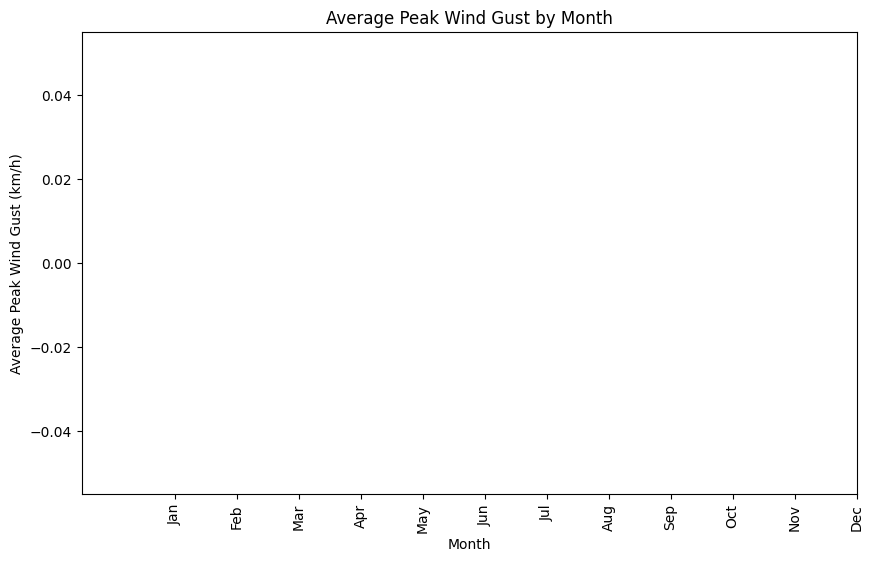

In [19]:
# Plot wpgt vs season
plt.figure(figsize=(10, 6))
weather_dataset_filled.groupby('season')['wpgt'].mean().plot(kind='bar', title='Average Peak Wind Gust by Season')
plt.xlabel('Season')
plt.ylabel('Average Peak Wind Gust (km/h)')
plt.show()

# Plot wpgt vs months
plt.figure(figsize=(10, 6))
weather_dataset_filled.groupby('month')['wpgt'].mean().plot(kind='bar', title='Average Peak Wind Gust by Month')
plt.xlabel('Month')
plt.ylabel('Average Peak Wind Gust (km/h)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [20]:
weather_dataset_filled.drop(columns=['wpgt'], inplace=True)

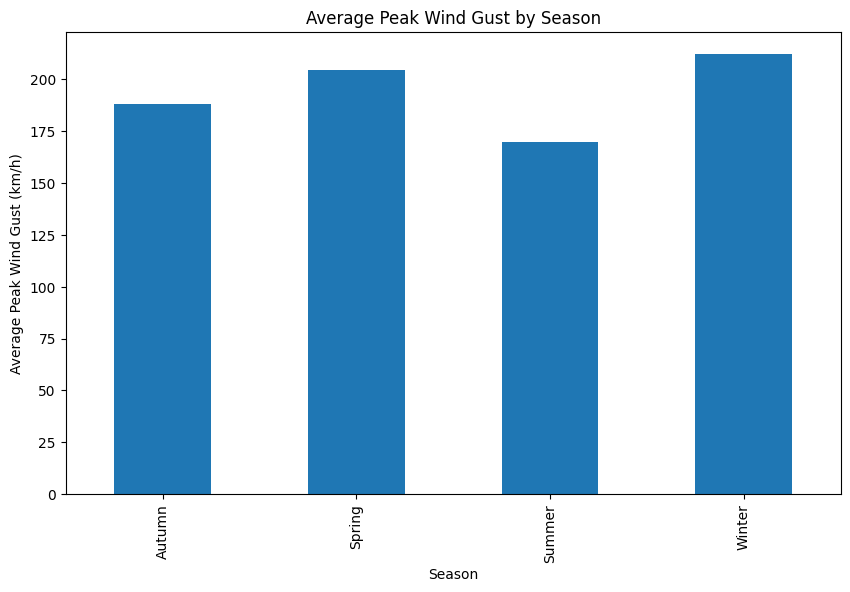

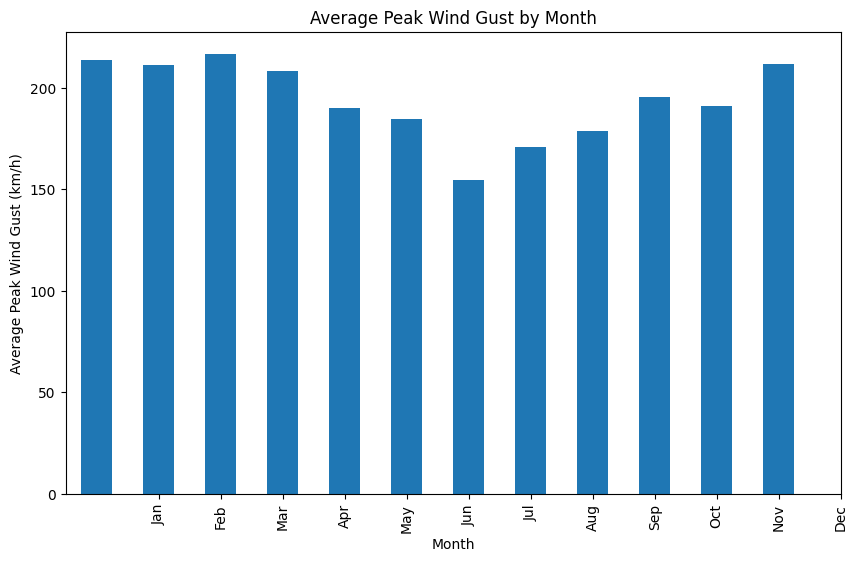

In [21]:
# Plot wpgt vs season
plt.figure(figsize=(10, 6))
weather_dataset_filled.groupby('season')['wdir'].mean().plot(kind='bar', title='Average Peak Wind Gust by Season')
plt.xlabel('Season')
plt.ylabel('Average Peak Wind Gust (km/h)')
plt.show()

# Plot wpgt vs months
plt.figure(figsize=(10, 6))
weather_dataset_filled.groupby('month')['wdir'].mean().plot(kind='bar', title='Average Peak Wind Gust by Month')
plt.xlabel('Month')
plt.ylabel('Average Peak Wind Gust (km/h)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [22]:
# Calculate the average wdir for each season
seasonal_avg_wdir = weather_dataset_filled.groupby('season')['wdir'].mean()

# Define a function to fill null values with the seasonal average
def fill_wdir_with_seasonal_avg(row):
    if pd.isnull(row['wdir']):
        return seasonal_avg_wdir[row['season']]
    else:
        return row['wdir']

# Apply the function to fill null values in the 'wdir' column
weather_dataset_filled['wdir'] = weather_dataset_filled.apply(fill_wdir_with_seasonal_avg, axis=1)

weather_dataset_filled.head()

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,month,hour,season
0,2000-03-06 06:00:00,NaN,NaN,NaN,0.0,20.0,51.8,1010.000000,3,6,Spring
1,2000-07-29 05:00:00,31.0,26.9,79.0,0.0,140.0,9.4,1010.000000,7,5,Summer
2,2000-09-12 02:00:00,27.0,24.1,84.0,0.0,80.0,0.0,1010.000000,9,2,Autumn
3,2000-09-26 12:00:00,29.0,18.2,52.0,0.0,320.0,7.6,1009.066204,9,12,Autumn
4,2000-10-13 00:00:00,22.0,16.1,69.0,0.0,230.0,3.6,1009.066204,10,0,Autumn


In [23]:
weather_dataset_filled.isna().sum()

time        0
temp      172
dwpt      175
rhum      175
prcp        0
wdir        0
wspd        6
pres        0
month       0
hour        0
season      0
dtype: int64

In [24]:
# Define a function to fill missing values with the average of the next 12 hours
def fill_missing_with_forward_rolling_mean(df, window=12):
    return df[::-1].rolling(window=window, min_periods=1).mean()[::-1]

# Apply the function to the 'temp', 'dwpt', and 'rhum' columns
weather_dataset_filled[['temp', 'dwpt', 'rhum','wspd']] = weather_dataset_filled[['temp', 'dwpt', 'rhum','wspd']].apply(lambda col: col.fillna(fill_missing_with_forward_rolling_mean(col)))

weather_dataset_filled.head()

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,month,hour,season
0,2000-03-06 06:00:00,28.272727,16.036364,50.045455,0.0,20.0,51.8,1010.000000,3,6,Spring
1,2000-07-29 05:00:00,31.000000,26.900000,79.000000,0.0,140.0,9.4,1010.000000,7,5,Summer
2,2000-09-12 02:00:00,27.000000,24.100000,84.000000,0.0,80.0,0.0,1010.000000,9,2,Autumn
3,2000-09-26 12:00:00,29.000000,18.200000,52.000000,0.0,320.0,7.6,1009.066204,9,12,Autumn
4,2000-10-13 00:00:00,22.000000,16.100000,69.000000,0.0,230.0,3.6,1009.066204,10,0,Autumn


In [25]:
weather_dataset_filled.isna().sum()

time      0
temp      0
dwpt      0
rhum      0
prcp      0
wdir      0
wspd      0
pres      0
month     0
hour      0
season    0
dtype: int64

In [26]:
weather_dataset_filled.rename(columns={'time': 'timestamp'}, inplace=True)
weather_dataset_filled.head()

,timestamp,temp,dwpt,rhum,prcp,wdir,wspd,pres,month,hour,season
0,2000-03-06 06:00:00,28.272727,16.036364,50.045455,0.0,20.0,51.8,1010.000000,3,6,Spring
1,2000-07-29 05:00:00,31.000000,26.900000,79.000000,0.0,140.0,9.4,1010.000000,7,5,Summer
2,2000-09-12 02:00:00,27.000000,24.100000,84.000000,0.0,80.0,0.0,1010.000000,9,2,Autumn
3,2000-09-26 12:00:00,29.000000,18.200000,52.000000,0.0,320.0,7.6,1009.066204,9,12,Autumn
4,2000-10-13 00:00:00,22.000000,16.100000,69.000000,0.0,230.0,3.6,1009.066204,10,0,Autumn


In [27]:
weather_dataset_filled.to_csv('dataset/weather_data_delhi_2000_2023_cleaned.csv', index=False)